In [1]:
import pandas as pd
import csv
import os

In [2]:
#prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Total_Phosphorus/'
#prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Total_Nitrogen/'
#prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Nitrate_Nitrogen/'
#prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Dissolved_Phosphorus/'
#prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Particulate_Phosphorus/'
prefex = '/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/water_runoff_sample/Ammoniacal_Nitrogen/'


file_list = [f for f in os.listdir(prefex) if f.endswith(".csv")]
print(file_list)


['Water_sample_runoff_citrus_Ammoniacal_Nitrogen.csv', 'Water_sample_runoff_corn_Ammoniacal_Nitrogen.csv', 'Water_sample_runoff_rice_Ammoniacal_Nitrogen.csv', 'Water_sample_runoff_vegetable_Ammoniacal_Nitrogen.csv']


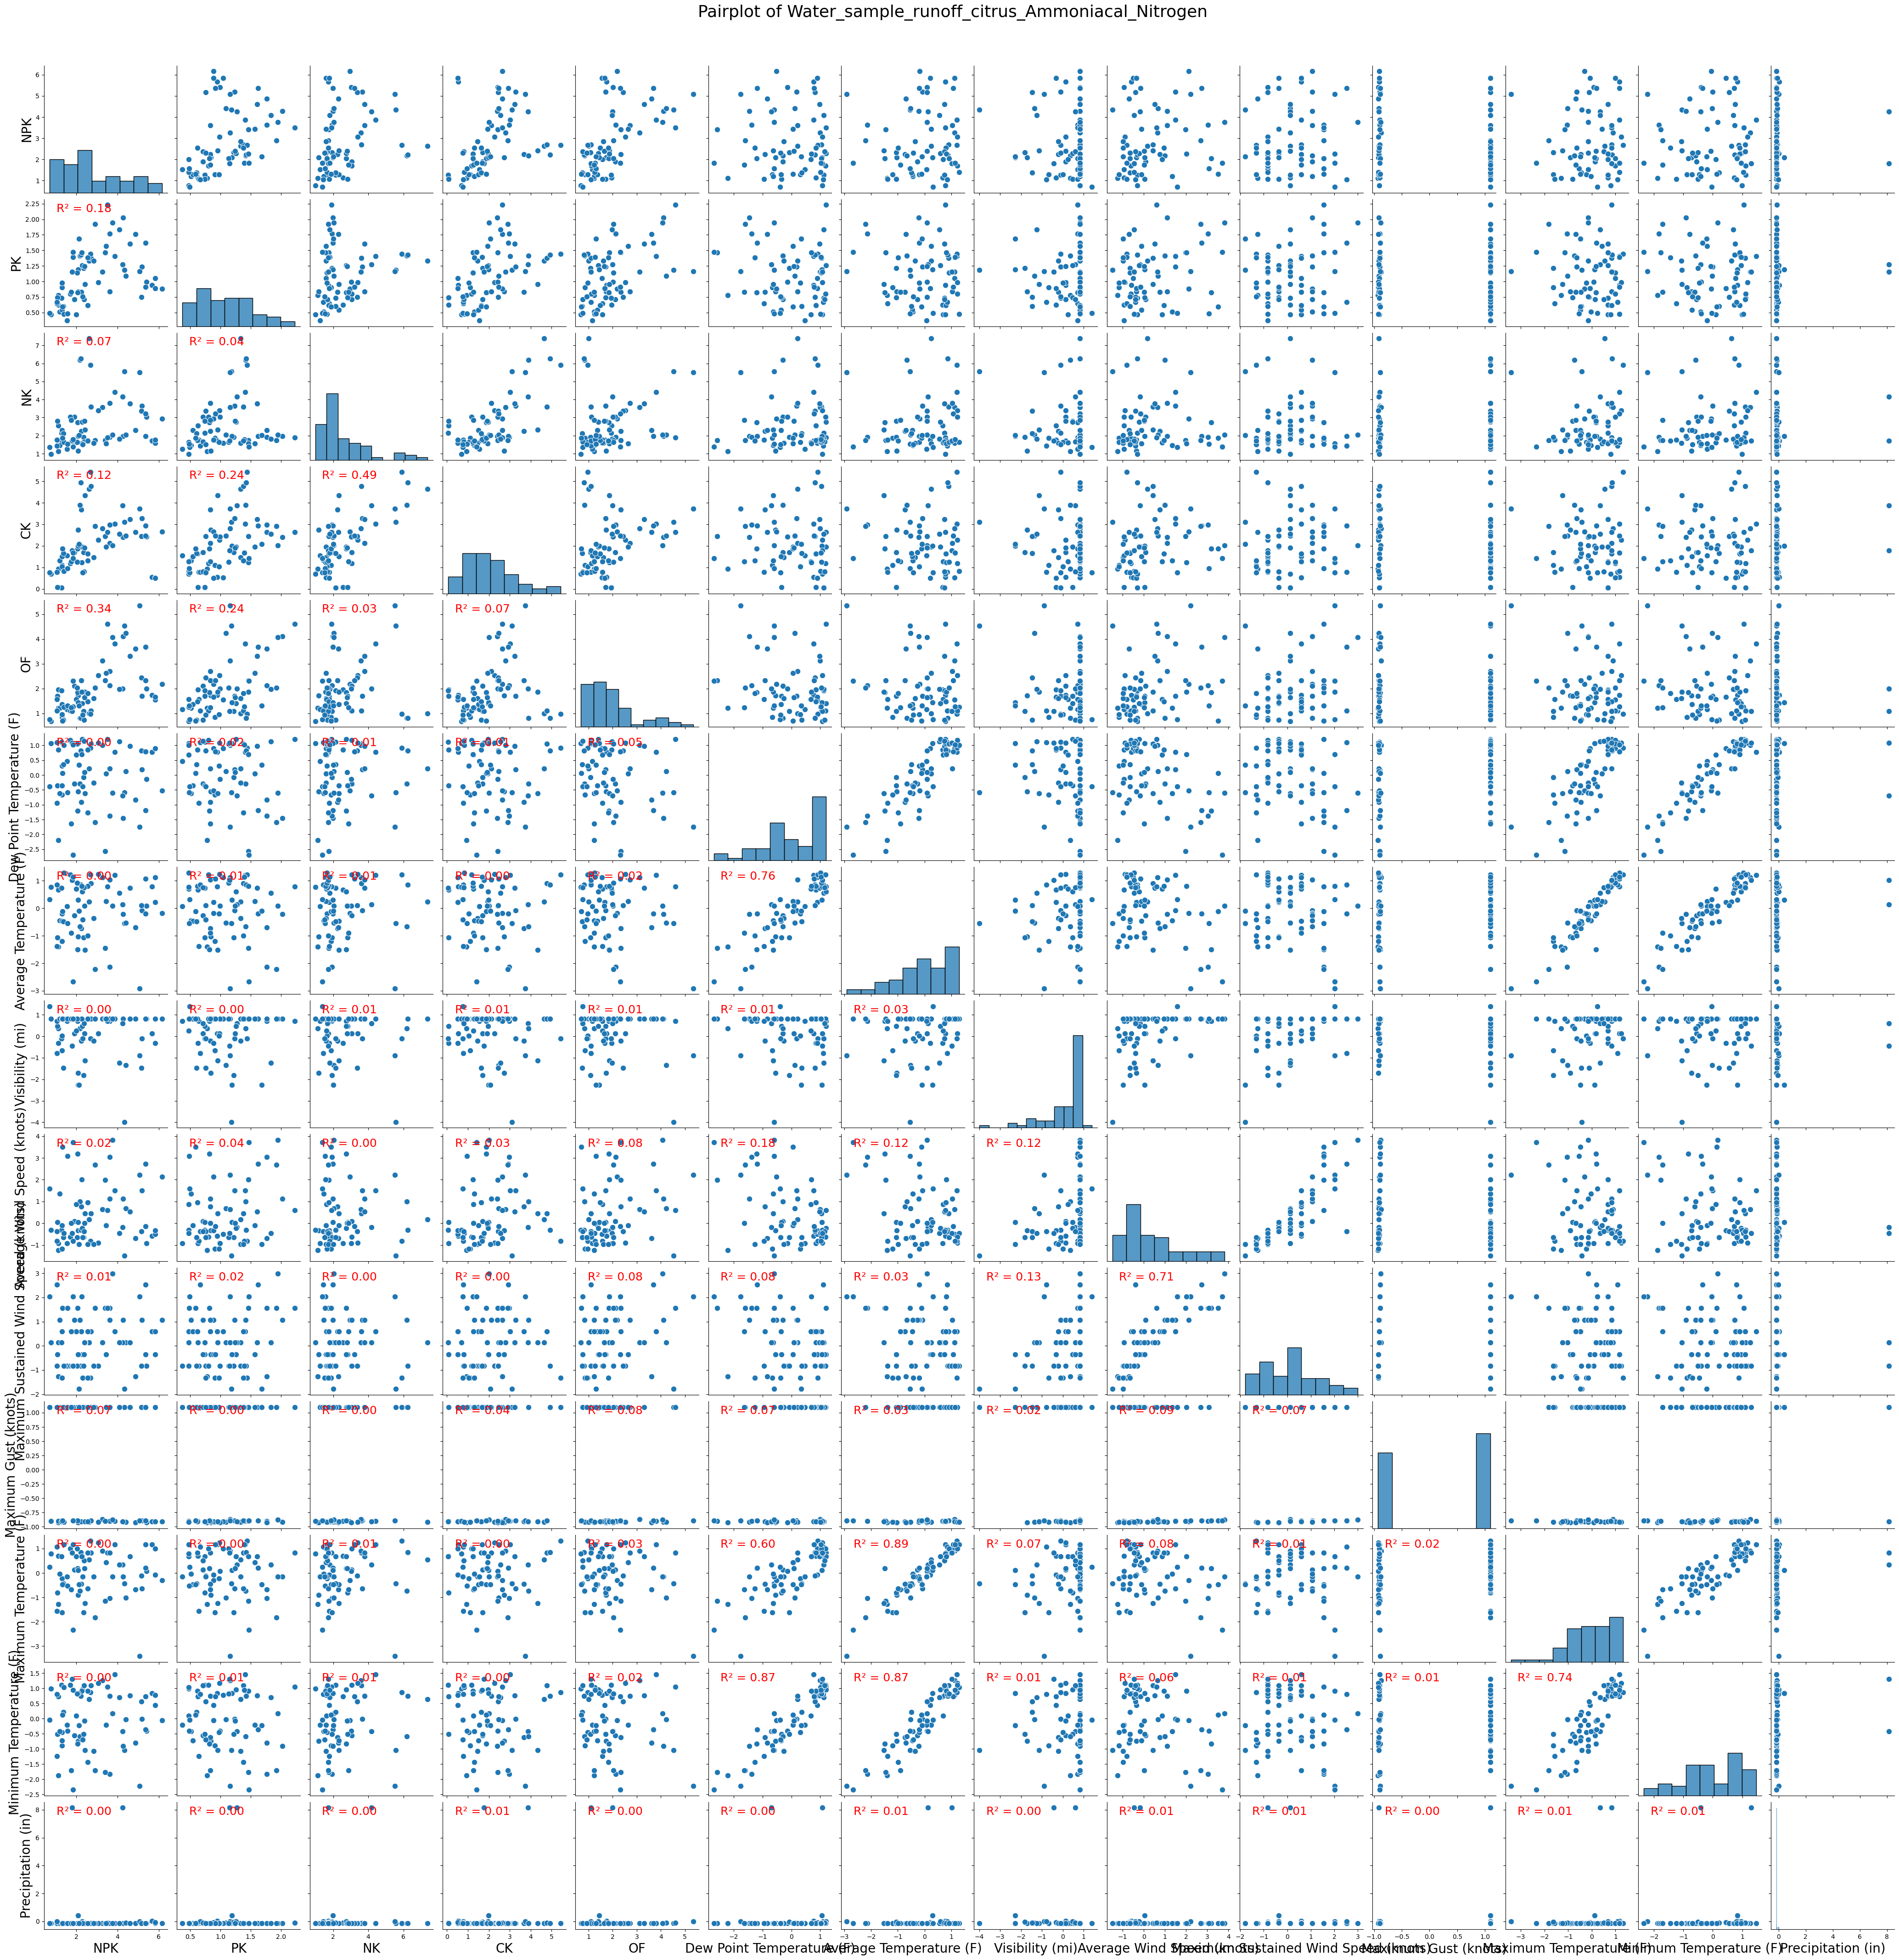

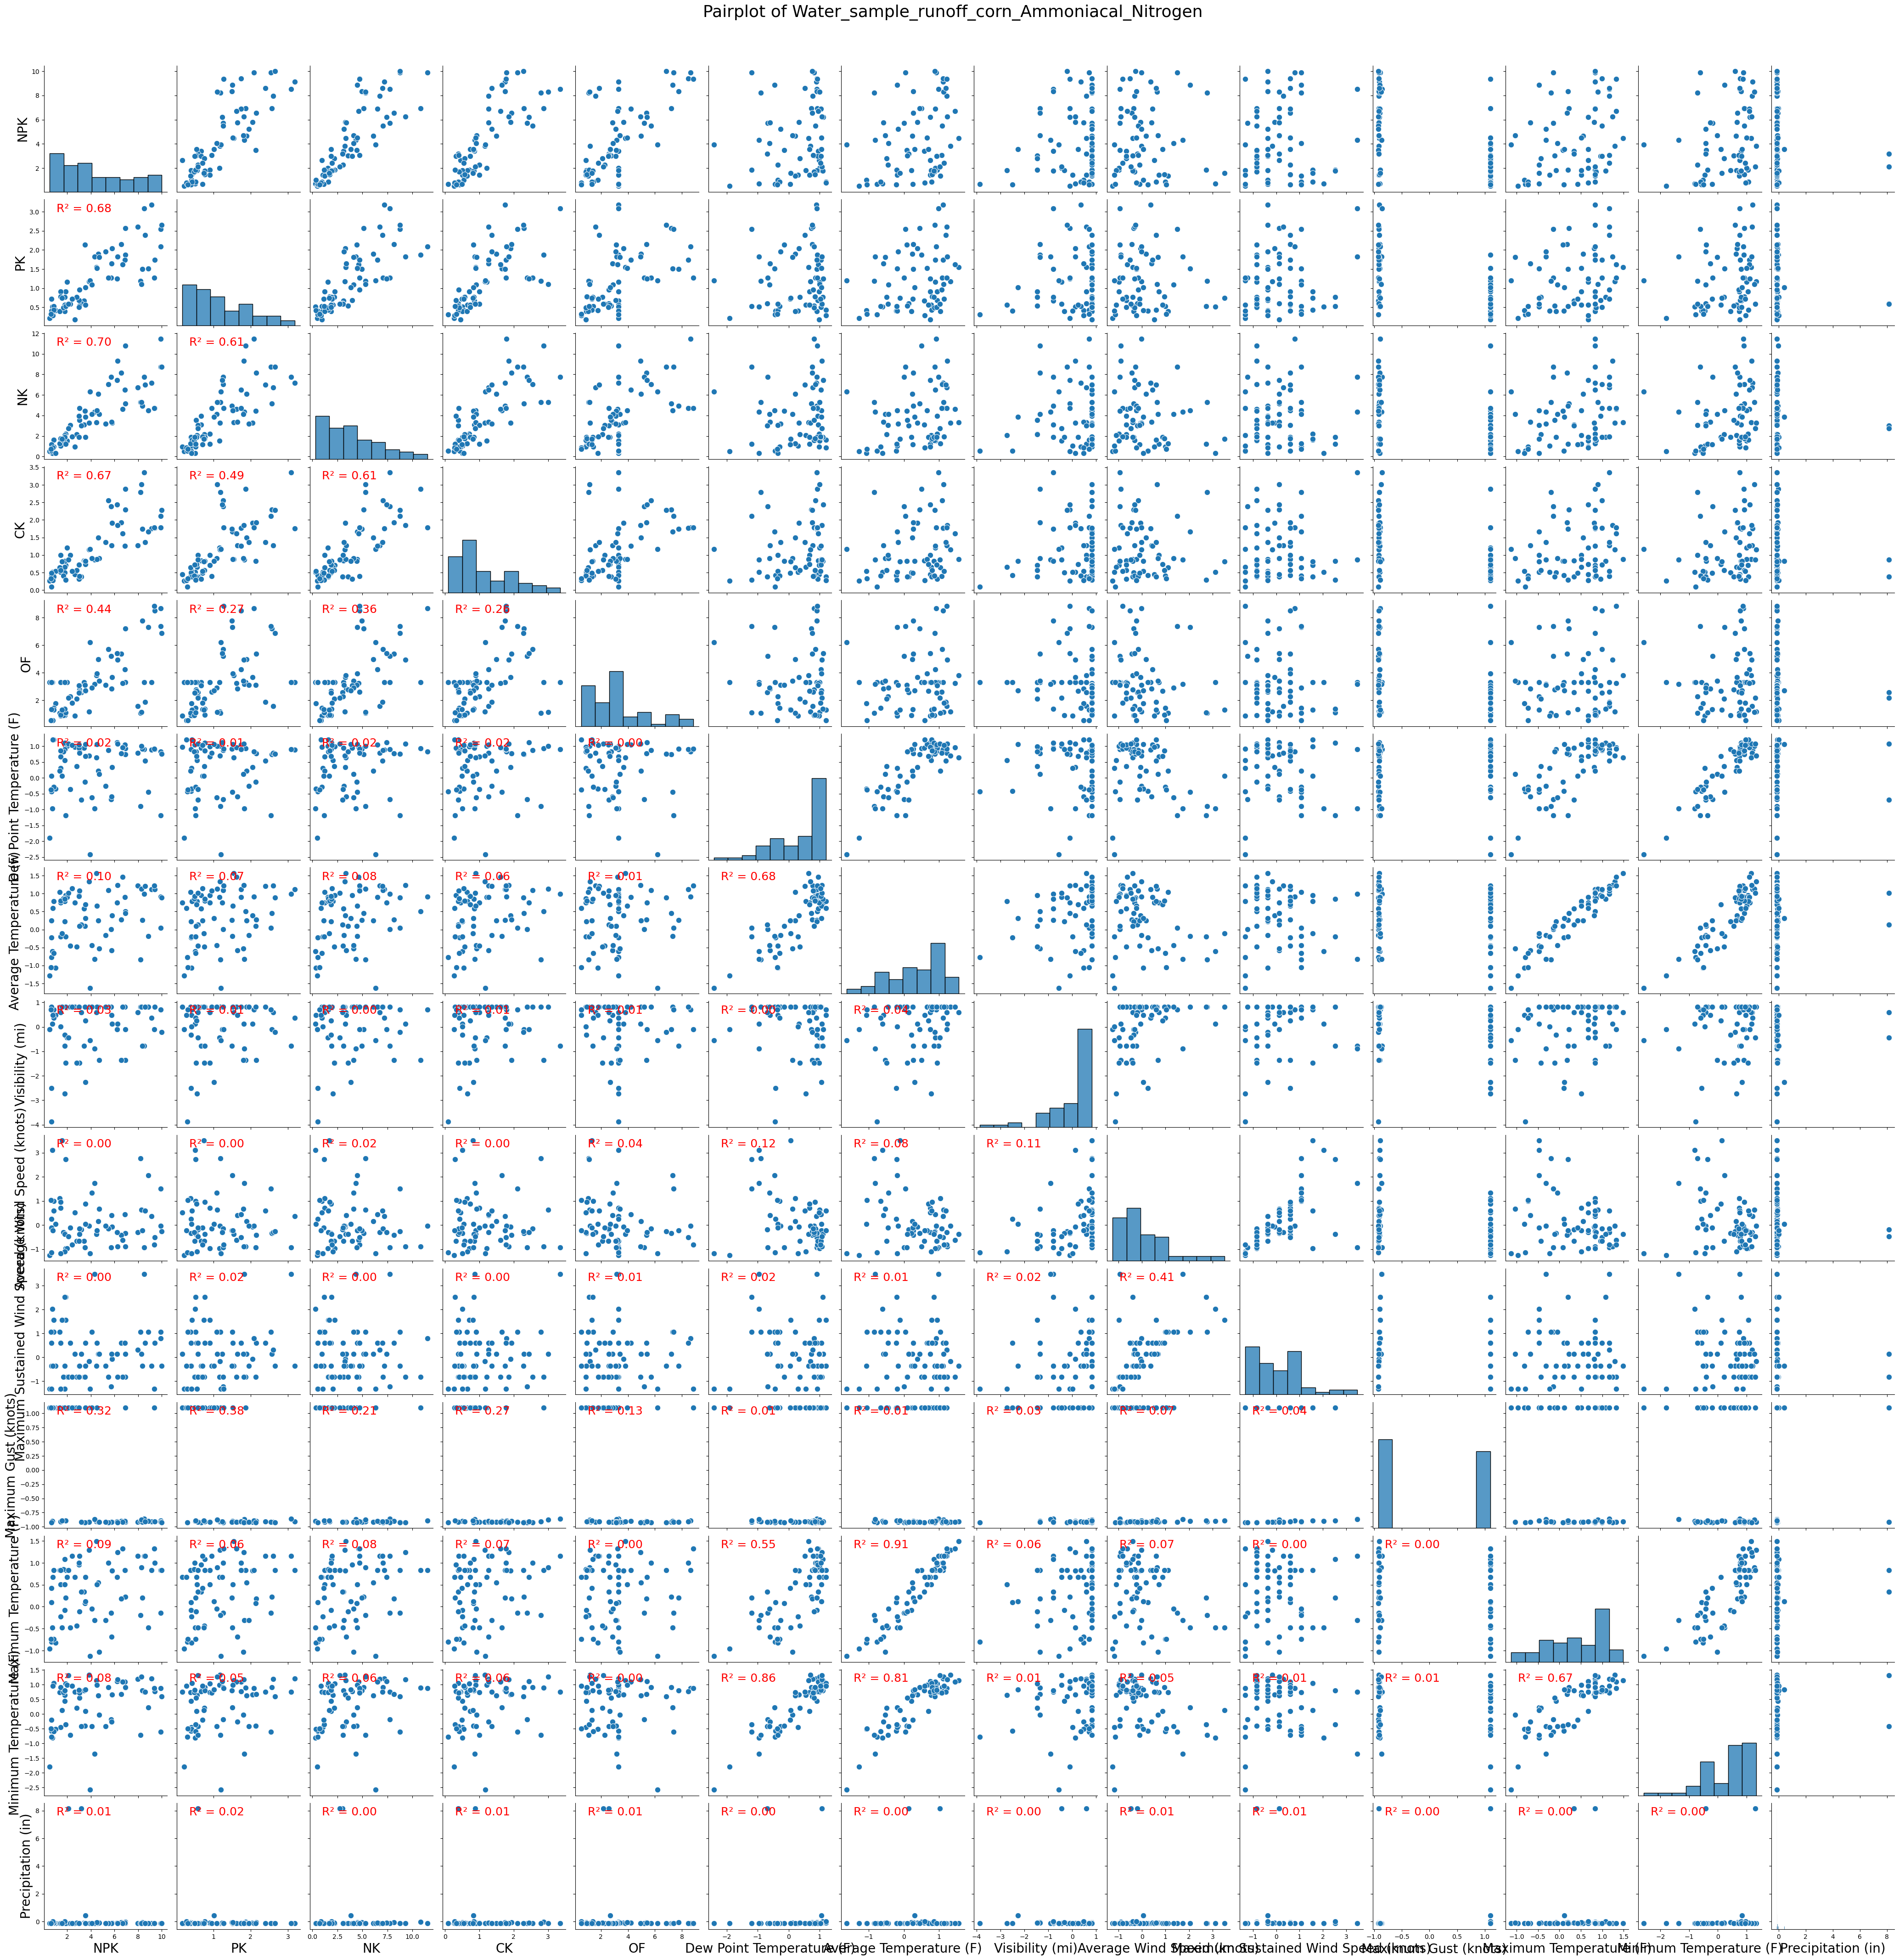

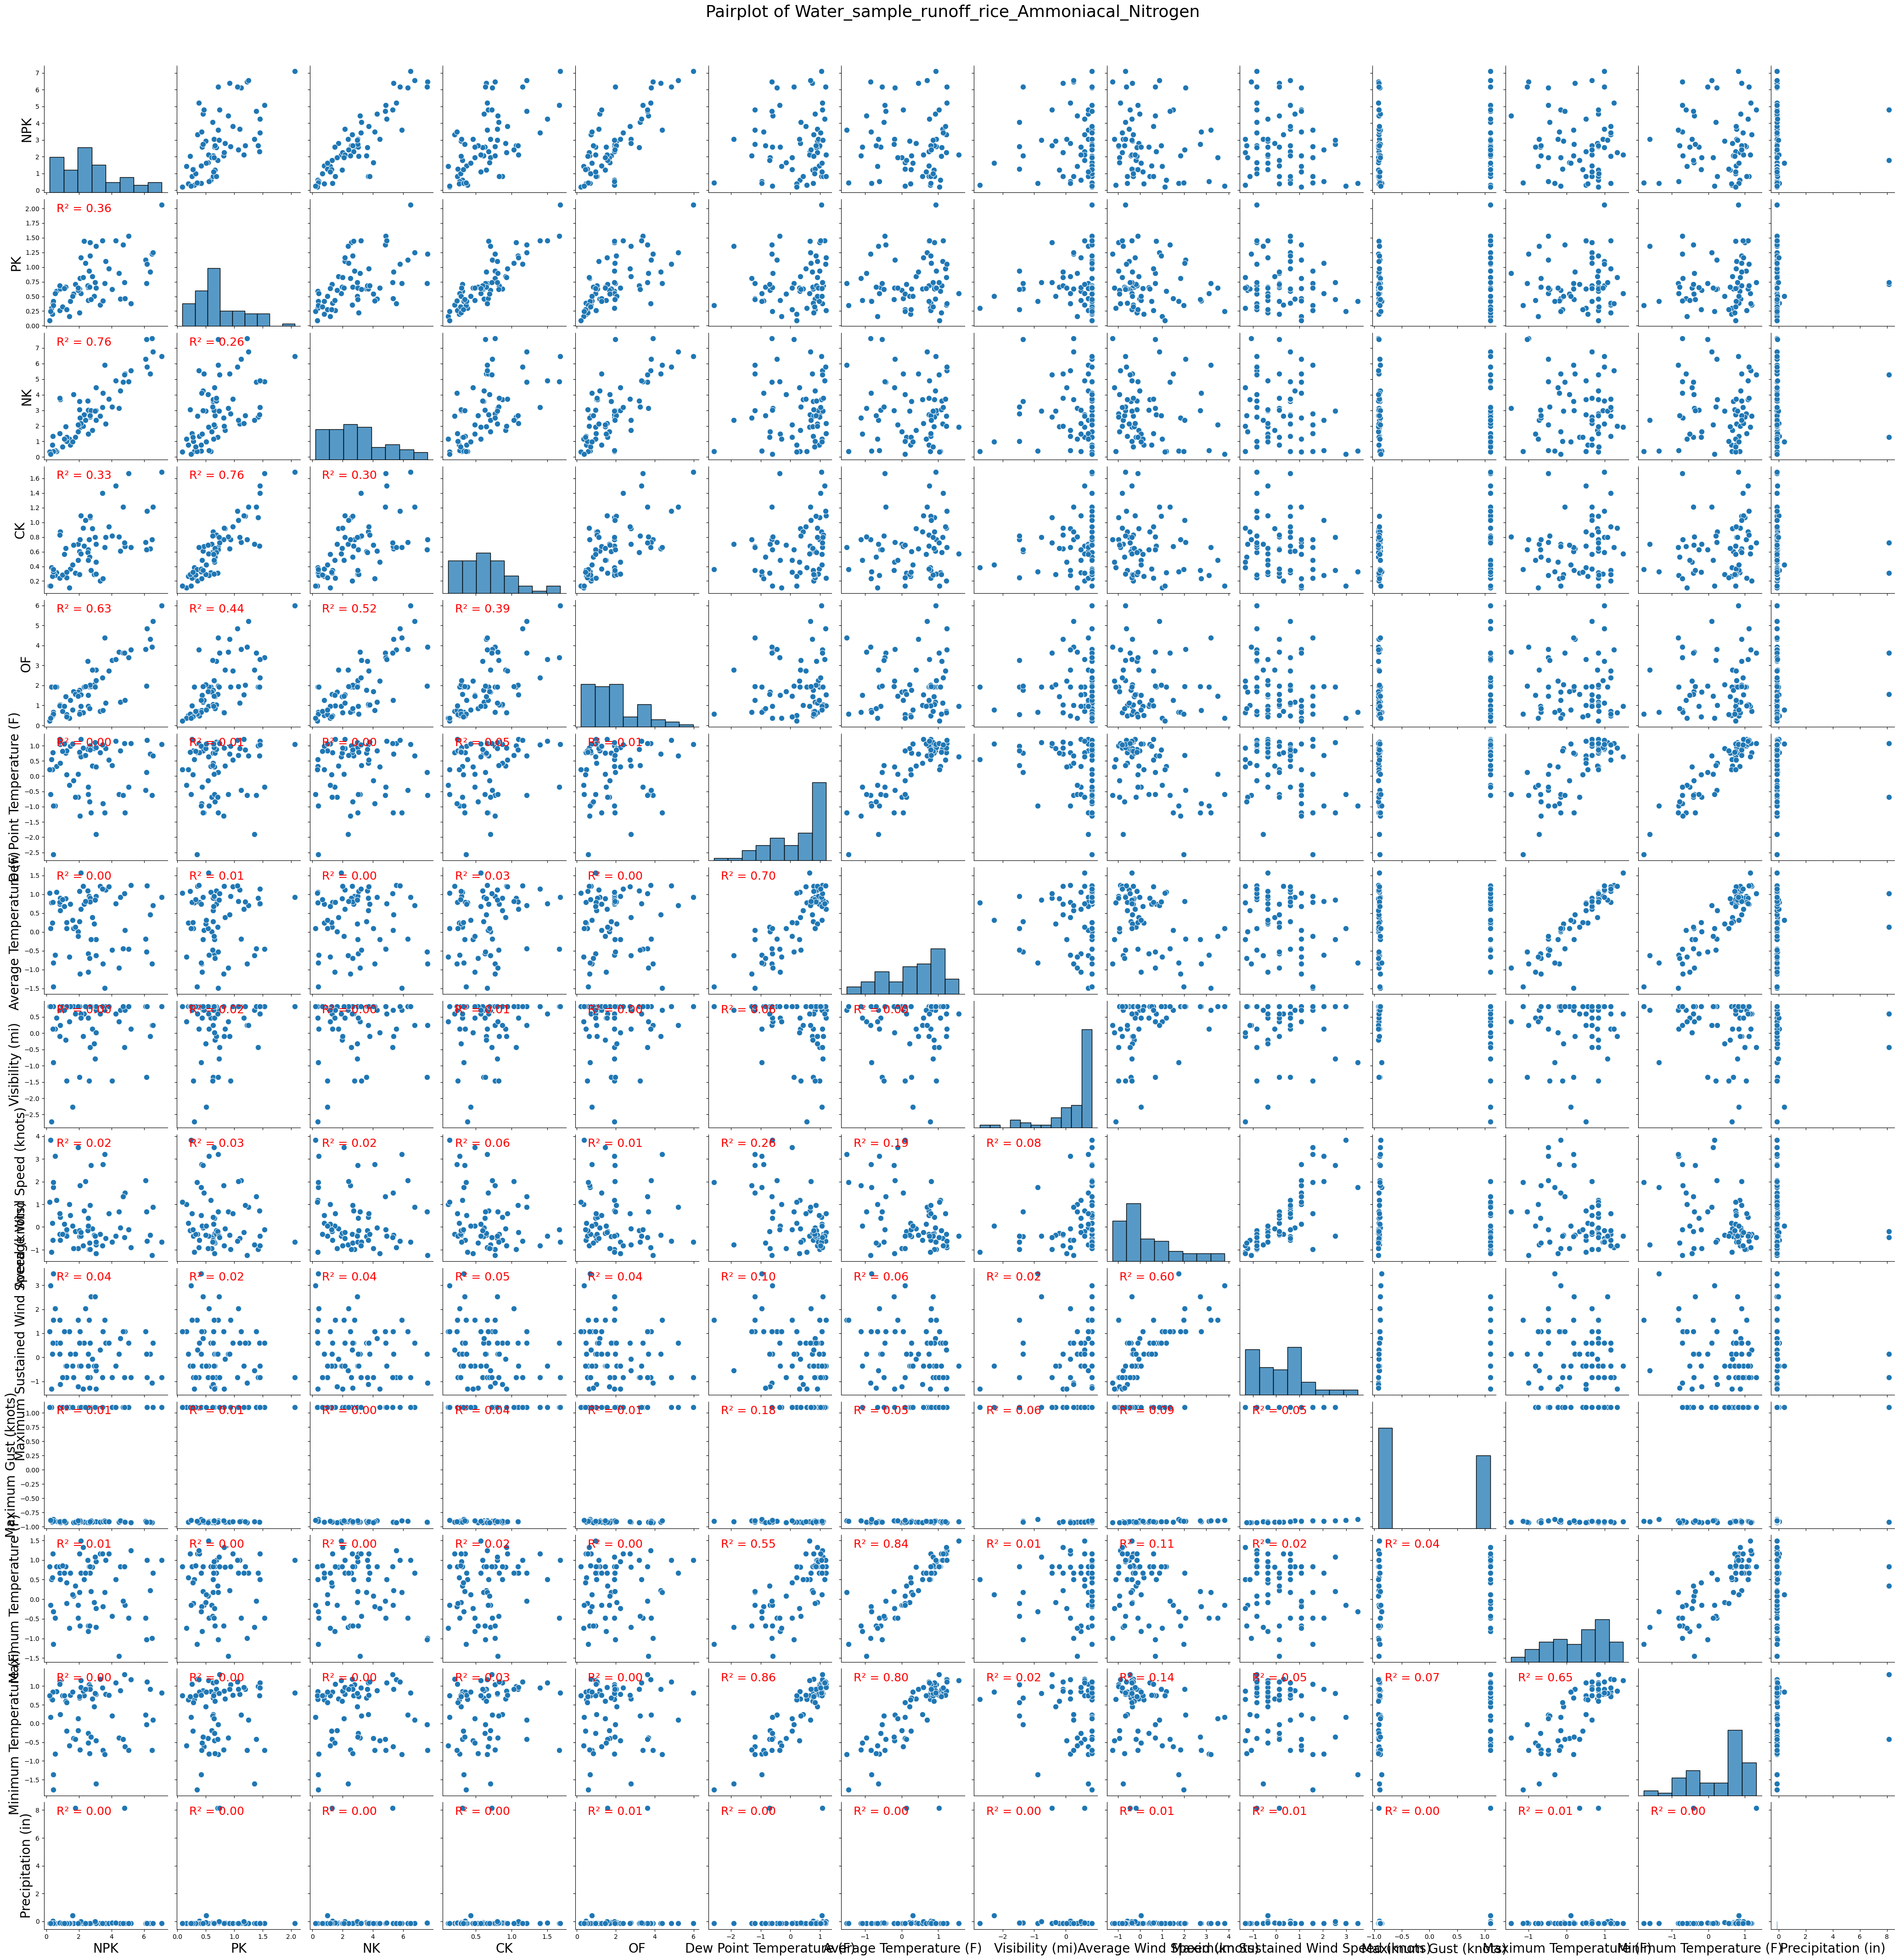

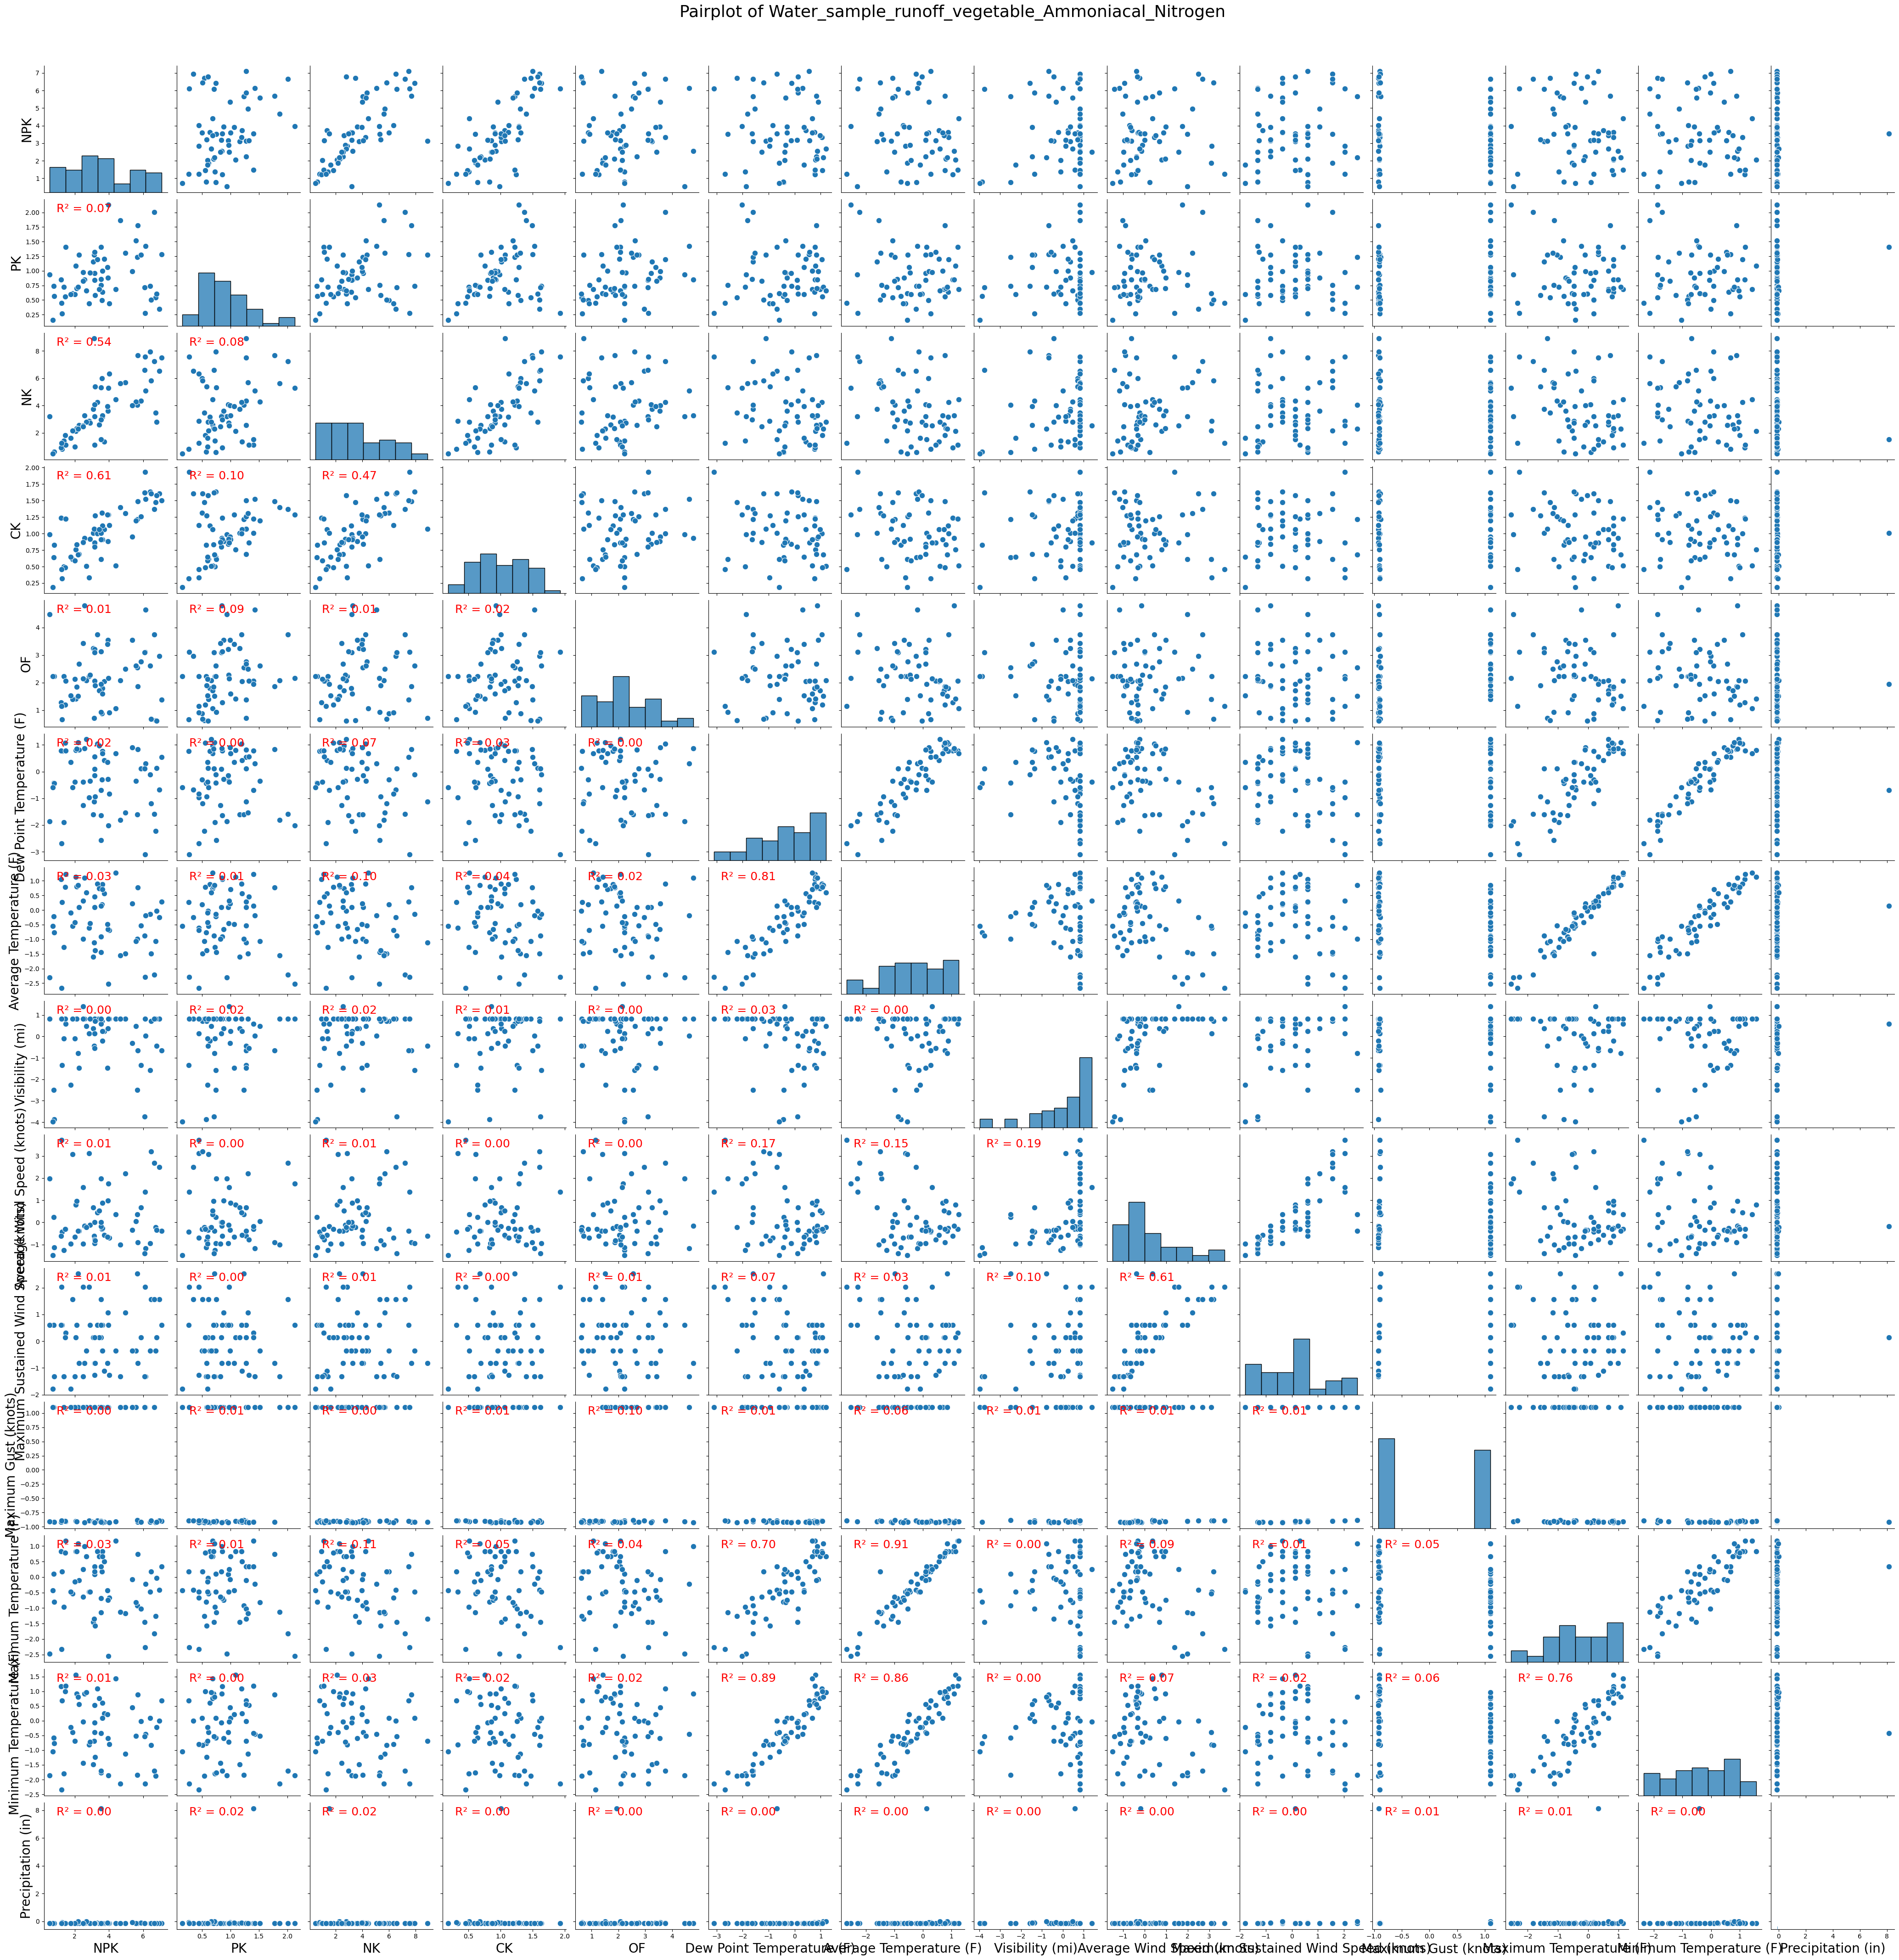

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


def pair_plot(file, prefex):
    # Load the dataset
    prefex_data = prefex + file
    data = pd.read_csv(prefex_data)
    
    # Exclude non-numeric columns
    numeric_data = data.select_dtypes(include=['number'])
    
    # Create pairplot with larger figure size and bigger markers
    g = sns.pairplot(numeric_data, height=3, markers="o", plot_kws={'s': 80})  # 's' controls marker size
    
    # Function to calculate and display R² value on lower triangle scatter plots
    def annotate_r2(x, y, **kwargs):
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r2 = r_value ** 2
        ax = plt.gca()
        ax.annotate(f"R² = {r2:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes, fontsize=18, color="red")
    
    # Apply R² annotation to lower triangle scatter plots
    g.map_lower(annotate_r2)
    
    # Increase font size of x and y labels
    for ax in g.axes.flat:
        if ax is not None:
            ax.set_xlabel(ax.get_xlabel(), fontsize=20)
            ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    plt.suptitle("Pairplot of" + " " + file.split('.')[0], fontsize=26, y=1.02)  # Adjust y to position the title higher
    plt.savefig('/Users/rjing/Desktop/Machine_Learning_Nonpoint_Source_Pollution/data/pair_plot/' + file.split('.')[0], dpi=400, bbox_inches="tight")  # Save with high resolution

    plt.show()


for file in file_list:
    pair_plot(file, prefex)